# Лабораторная работа №5 <br>
Восстановления плотностей неопределенности

In [14]:
import math
import copy
import numpy as np
import random
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
from sklearn.mixture import GaussianMixture

Опишем распределения

In [15]:
def Linear(Start, End): #Равномерное
    return random.random() * (End-Start) + Start

def Line(DataSize, Start, End):
    x = []
    for i in range(DataSize):
      x.append(Linear(Start, End))
    return x

In [16]:
def Norm(M, D):  #Нормальное
    n = 12
    x = 0
    for i in range (n):
      x = x + random.random()
    return D * (12/n)**(1/2) * (x - n/2) + M

def Normal(DataSize, M, D):
    x = []
    for i in range(DataSize):
      x.append(Norm(M, D))
    return x

In [17]:
def TwoPeaks(N, m1, d1, m2, d2):# Двугорбая(2 нормальных со смещением)
    x = []
    for i in range(N):
        r = random.random()
        if r > 0.5:
          x.append(Norm(m1,d1))
        else:
          x.append(Norm(m2,d2))
    return x

Метод Парзена-Розенлата <br>
в качестве ядра будем использовать функцию Гаусса

In [18]:
def gauss_kernel(r):
     return ((2 * math.pi) ** (-1 / 2)) * np.exp(-1 / 2 * (r ** 2))

def ParzenRosenblatt(x, data, h):
    p = 0
    for i in data:
        p = p + gauss_kernel((x - i)/h)/ (len(data)*h)
    return p

Восстановим плотности

Линейная плотность с параметрами Start = 0, End = 1


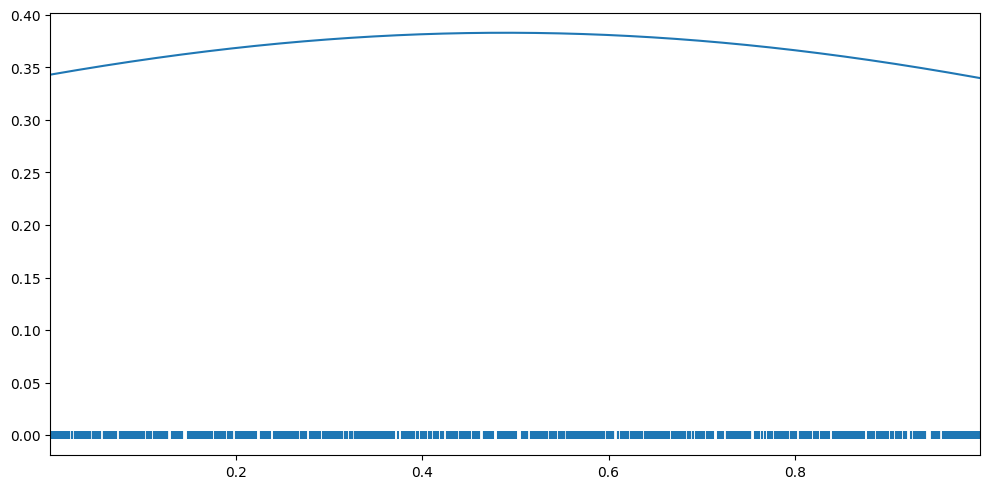

Нормальная плотность с параметрами M = 0, D = 1


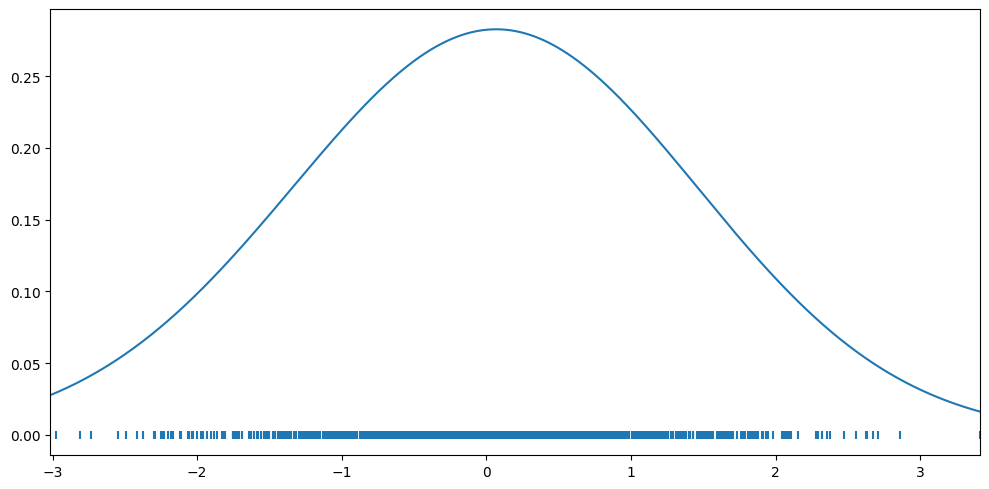

Плотность "два горба" с параметрами M1 = -8, D1 = 1, M2 = 8, D2 = 2


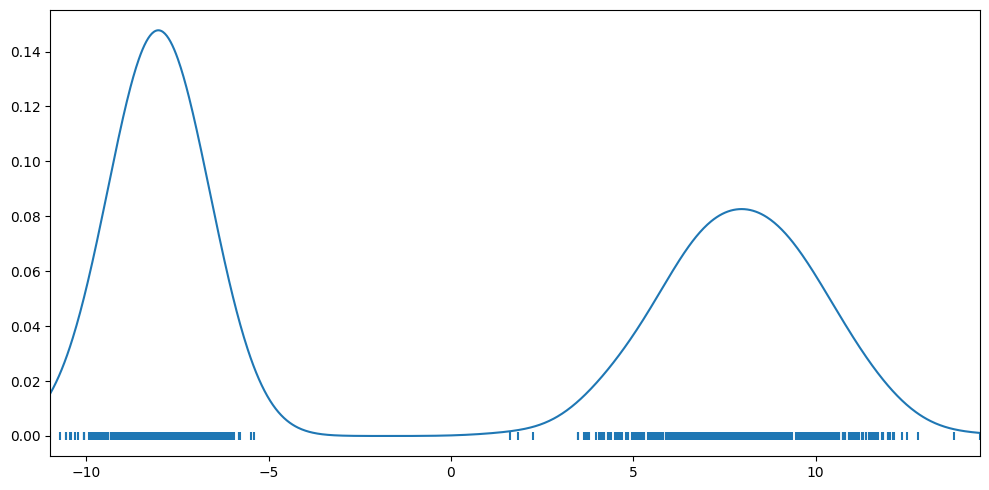

In [19]:
N = 1000

def plot(DataSize, data):
  plt_min = min(data)
  plt_max = max(data)
  x = np.linspace(plt_min, plt_max, DataSize)
  Points = np.zeros((DataSize))

  fig, ax = plt.subplots(figsize=(10,5))
  ax.plot(x, ParzenRosenblatt(x, data, h=1))
  ax.scatter(data, Points, marker = "|")
  ax.set_xlim((plt_min, plt_max))
  plt.tight_layout()
  plt.show()

#график 1
Start = 0
End = 1
lin_dat = Line(N, Start, End)
print(f'Линейная плотность с параметрами Start = {Start}, End = {End}')
plot(N, lin_dat)
#график 2
M=0
D=1
nor_dat = Normal(N, M, D)
print(f'Нормальная плотность с параметрами M = {M}, D = {D}')
plot(N, nor_dat)
#график 3
M1=-8
D1=1
M2=8
D2=2
tp_dat = TwoPeaks(N, M1, D1, M2, D2)
print(f'Плотность "два горба" с параметрами M1 = {M1}, D1 = {D1}, M2 = {M2}, D2 = {D2}')
plot(N, tp_dat)

Оптимизируем ширину окна методом Leave One Out

In [20]:
def leave_one_out(data,h):
    loo = 0
    for i in range(len(data)):
        loo = loo - math.log(ParzenRosenblatt(data[i],copy.copy(data[:i] + data[i+1:]),h=h))
    return loo

list = np.arange(0.5, 10.5, 0.5)
loo_min = 100000
h_min = 11
for h in list:
    if leave_one_out(tp_dat,h) < loo_min:
        loo_min = leave_one_out(lin_dat,h)
        h_min = h
print(f"LOO при стартовом значении: {leave_one_out(tp_dat,h)}")

LOO при стартовом значении: 3681.3071795861183


Плотность "два горба" с параметрами M1 = -8, D1 = 1, M2 = 8, D2 = 2


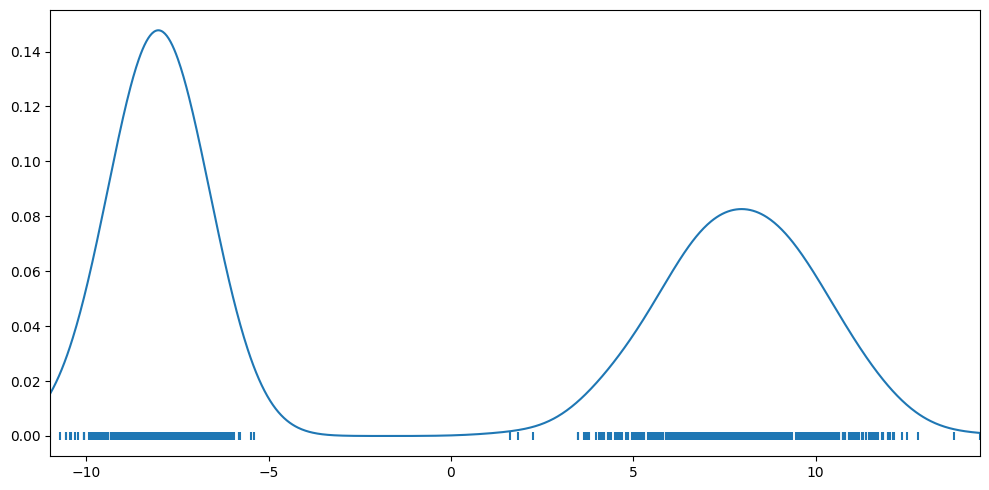

In [21]:
print(f'Плотность "два горба" с параметрами M1 = {M1}, D1 = {D1}, M2 = {M2}, D2 = {D2}')
plot(N, tp_dat)

In [22]:
print(f"Оптимальный h по критерию LLO: {h_min}")
print(f"LOO при оптимальном значении: {loo_min}")

Оптимальный h по критерию LLO: 0.5
LOO при оптимальном значении: 501.30640851665083


Плотность "два горба" с параметрами M1 = -8, D1 = 1, M2 = 8, D2 = 2


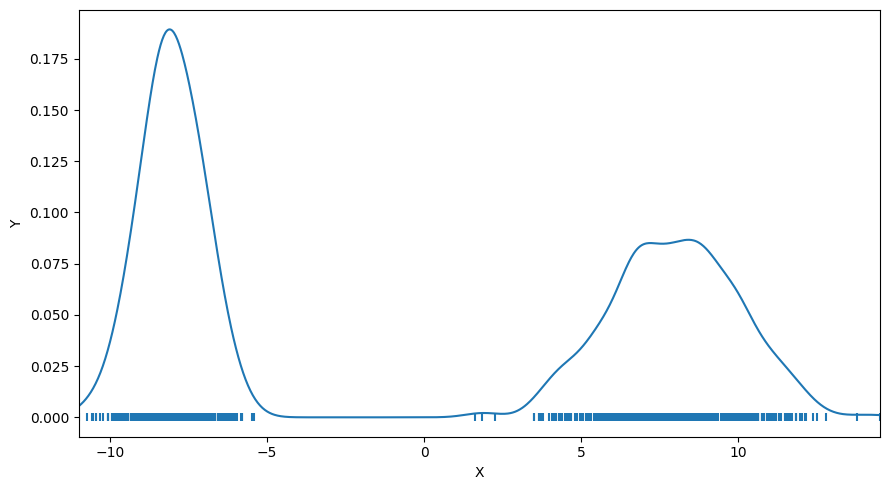

In [25]:
fig, ax = plt.subplots(figsize=(9,5))
plt_min = min(tp_dat)
plt_max = max(tp_dat)
x = np.linspace(plt_min, plt_max, N)
ax.plot(x, ParzenRosenblatt(x, tp_dat, h=h_min))
points = np.zeros((1000))

ax.scatter(tp_dat,points, marker = "|")

# Оформление
ax.set_xlim((plt_min, plt_max))

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
print(f'Плотность "два горба" с параметрами M1 = {M1}, D1 = {D1}, M2 = {M2}, D2 = {D2}')
plt.show()

Алгоритм из sklearn для сгенерированных данных с двумя горбами 

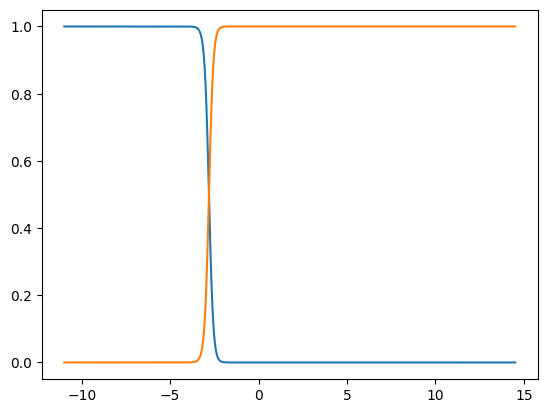

In [26]:
X = np.array(tp_dat).reshape(-1, 1)
gm = GaussianMixture(n_components=2, random_state=0).fit(X)
gm.means_
plt.plot(x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,0],x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,1])
plt.show()